# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the File

In [3]:
df=pd.read_csv('flipkart_sales_enriched.csv')
df.head(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,Month,Year,Profit (INR),Discount %,Customer Segment,Region
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September,2024,19627.824,11,Online,West
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December,2024,10204.680,24,Wholesale,North
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024,8873.752,19,Online,South
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,November,2024,6531.562,15,Online,North
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,December,2024,15954.048,12,Retail,North


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price              1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales        1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
 9   Month              1000 non-null   object 
 10  Year               1000 non-null   int64  
 11  Profit             1000 non-null   float64
 12  Discount %         1000 non-null   int64  
 13  Customer Segment   1000 non-null   object 
 14  Region             1000 non-null   object 
 15  Products Combined  1000 non-null   object 
dtypes: float64(4), int64(3), 

,Price,Quantity Sold,Total Sales,Customer Rating,Year,Profit,Discount %
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24520.258260,3.097000,75213.112740,3.011100,2024.103000,15042.622548,17.699000
std,14187.611227,1.410525,59457.598352,1.145408,0.304111,11891.519670,7.847801
min,139.850000,1.000000,419.550000,1.000000,2024.000000,83.910000,5.000000
25%,12378.905000,2.000000,28581.765000,2.000000,2024.000000,5716.353000,11.000000
50%,24650.015000,3.000000,57358.300000,3.100000,2024.000000,11471.660000,18.000000
75%,35981.925000,4.000000,110618.595000,4.000000,2024.000000,22123.719000,25.000000
max,49911.750000,5.000000,243903.900000,5.000000,2025.000000,48780.780000,30.000000


# Shape of the File

In [4]:
print("The number of rows and columns of the table is : ",df.shape)

The number of rows and columns of the table is :  (1000, 15)


# Renaming the column Names

In [5]:
df.rename(columns={'Price (INR)':'Price','Total Sales (INR)':'Total Sales','Profit (INR)':'Profit'},inplace=True)
df.head(2)

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating,Month,Year,Profit,Discount %,Customer Segment,Region
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September,2024,19627.824,11,Online,West
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December,2024,10204.680,24,Wholesale,North


# Descriptive / Aggregate Analysis

In [6]:
total_profit=sum(df['Profit'])
print("The total profit of the company is : ",total_profit)

The total profit of the company is :  15042622.548
The total sales of the company is :  75213112.74
The total orders the company got is :  1000


In [30]:
total_sales=sum(df['Total Sales'])
print("The total sales of the company is : ",total_sales)

The total sales of the company is :  75213112.74


In [31]:
total_orders=df['Order ID'].nunique()
print("The total orders the company got is : ",total_orders)

The total orders the company got is :  1000


In [7]:
Total_sales_revenue=(df['Quantity Sold']*df['Price']).sum()
print("Total sales revenue of the company is : ",Total_sales_revenue)

Total sales revenue of the company is :  75213112.74000001


In [8]:
average_order_value=Total_sales_revenue/total_orders
print("The average order value per prodcut is :",average_order_value) 

The average order value per prodcut is : 75213.11274000001


# Top Product by Sales, Quantity, profit

In [9]:
top_product_sales=df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(1)
print("Top product by sales : ",top_product_sales)
print("\n")
top_product_quantity_sold=df.groupby('Product Name')['Quantity Sold'].sum().sort_values(ascending=False).head(1)
print("Top product quantity sold : ",top_product_quantity_sold)
print("\n")
top_product_profit=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(1)
print("Top product by profit : ",top_product_profit)

Top product by sales :  Product Name
Educational Book    4522055.35
Name: Total Sales, dtype: float64


Top product quantity sold :  Product Name
Educational Book    188
Name: Quantity Sold, dtype: int64


Top product by profit :  Product Name
Educational Book    904411.07
Name: Profit, dtype: float64


# Worst Product by Sales, Quantity, Profit

In [10]:
worst_product_sales=df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).tail(1)
print("worst product by sales : ",worst_product_sales)
print("\n")
worst_product_quantity_sold=df.groupby('Product Name')['Quantity Sold'].sum().sort_values(ascending=False).tail(1)
print("worst product quantity sold : ",worst_product_quantity_sold)
print("\n")
worst_product_profit=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(1)
print("worst product by profit : ",worst_product_profit)

worst product by sales :  Product Name
Bedsheet    1883843.28
Name: Total Sales, dtype: float64


worst product quantity sold :  Product Name
Bedsheet    89
Name: Quantity Sold, dtype: int64


worst product by profit :  Product Name
Bedsheet    376768.656
Name: Profit, dtype: float64


# Top product by Region

In [11]:
top_product_by_region=df.groupby('Product Name')['Region'].unique()
print("Top product by region : ",top_product_by_region)

Top product by region :  Product Name
Bedsheet            [South, West, East, North]
Comic Book          [South, West, East, North]
Cookbook            [East, South, North, West]
Cookware Set        [North, South, East, West]
Dress               [East, West, South, North]
Educational Book    [West, South, East, North]
Face Cream          [South, East, North, West]
Fiction Novel       [East, North, South, West]
Hair Dryer          [East, West, South, North]
Headphones          [West, South, East, North]
Jacket              [North, South, West, East]
Jeans               [North, East, West, South]
Laptop              [South, North, West, East]
Lipstick            [South, East, North, West]
Mixer Grinder       [North, South, West, East]
Perfume             [West, South, East, North]
Self-Help Book      [South, West, East, North]
Shampoo             [North, South, East, West]
Smartphone          [East, South, West, North]
Smartwatch          [North, West, East, South]
Sneakers            [N

# Highest and Lowest Sales by months

In [34]:
highest_sales = df.groupby('Month')['Total Sales'].sum().sort_values(ascending=False).head(1)
lowest_sales = df.groupby('Month')['Total Sales'].sum().sort_values(ascending=False).tail(1)

print("Month with Highest Sales:\n", highest_sales)
print("\nMonth with Lowest Sales:\n", lowest_sales)

Month with Highest Sales:
 Month
July    7637324.95
Name: Total Sales, dtype: float64

Month with Lowest Sales:
 Month
June    4992364.75
Name: Total Sales, dtype: float64


# Bar chart of Quantity sold per unit Product

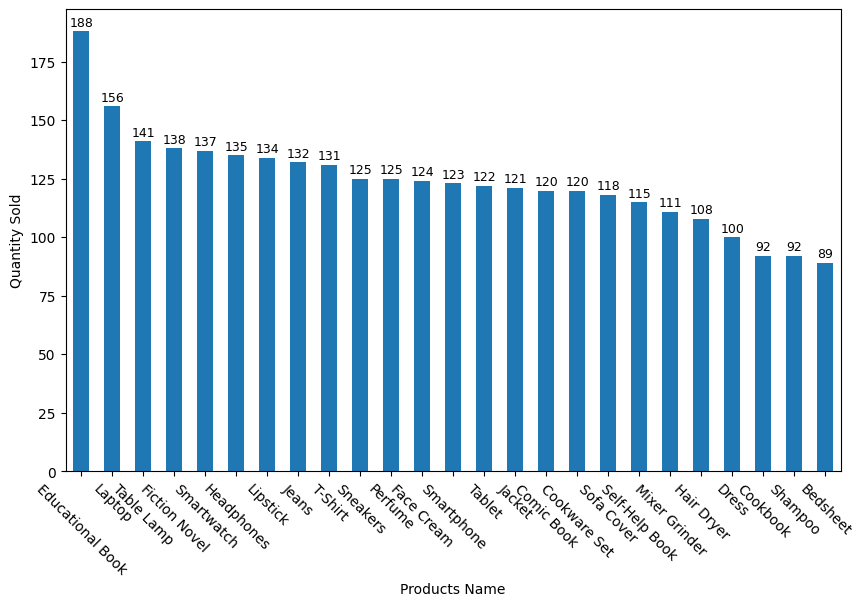

In [25]:
top_products=df.groupby('Product Name')['Quantity Sold'].sum().nlargest(30)
ax=top_products.plot(kind='bar',figsize=(10,6))
plt.xlabel('Products Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=-45)
for i, v in enumerate(top_products):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)
plt.show()

# Customer Rating Charts

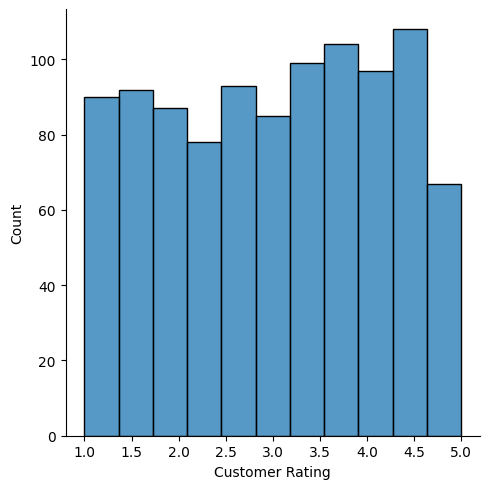

In [26]:
sns.displot(df['Customer Rating'])

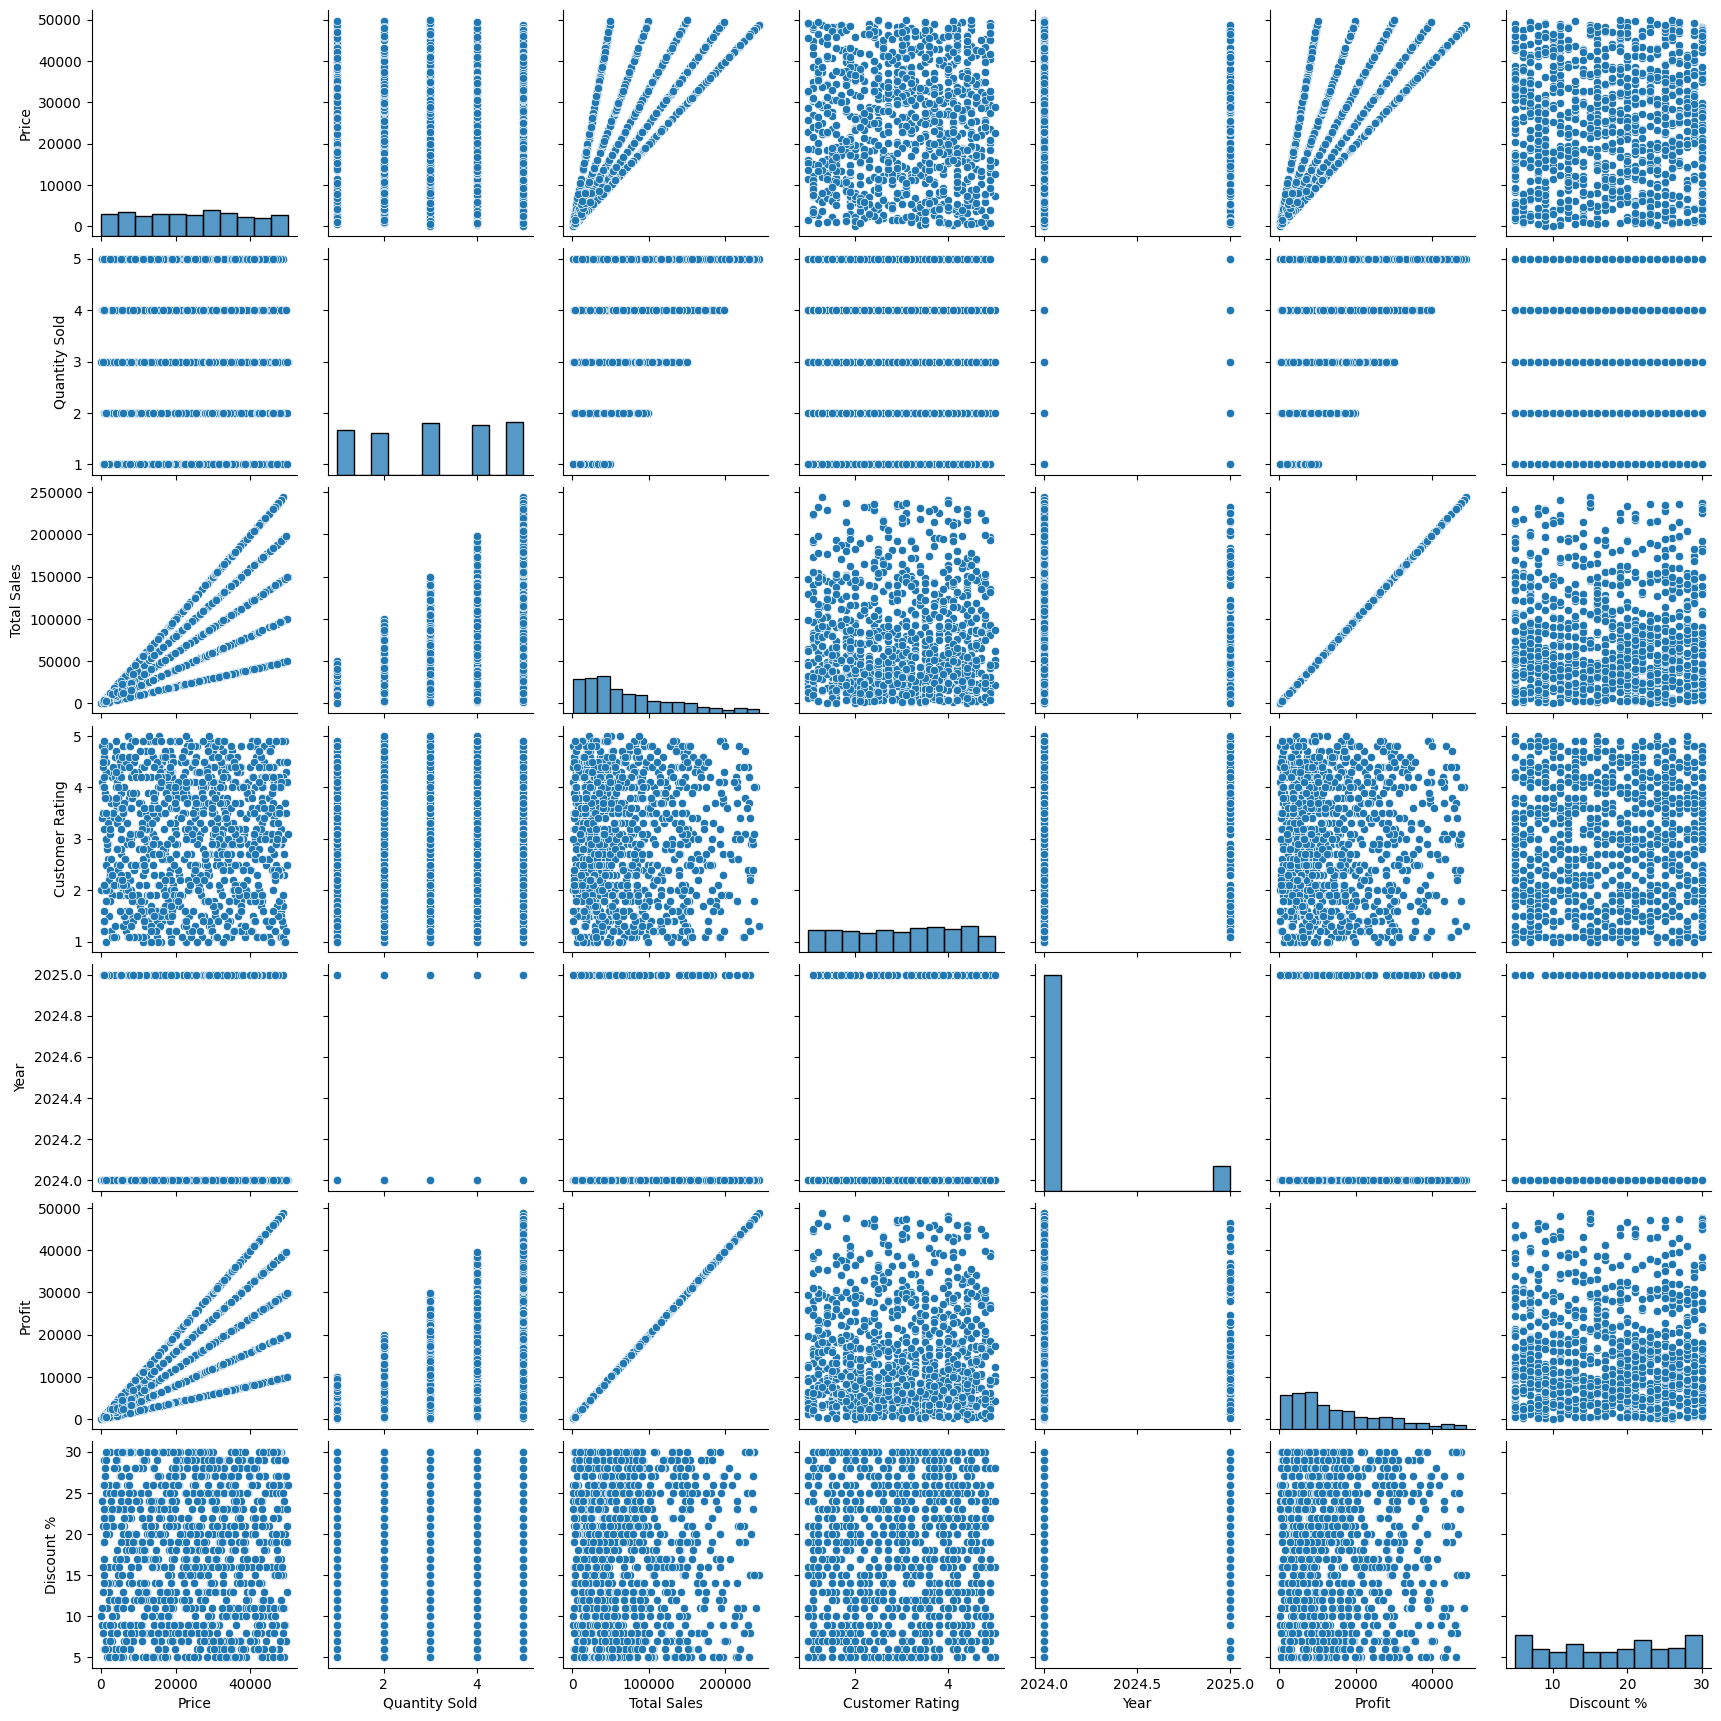

In [27]:
sns.pairplot(df)

# Profit distribution Region Wise

Text(0.5, 1.0, 'Profit distribution Region wise')

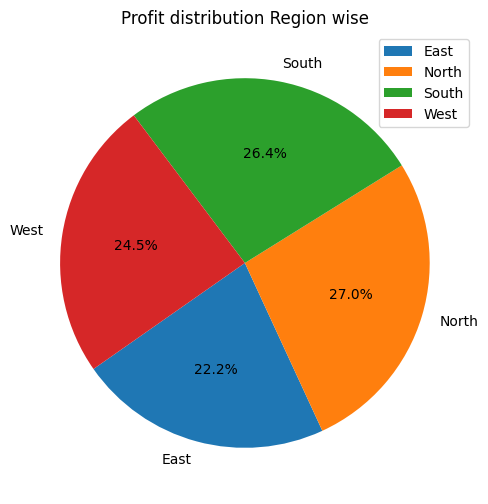

In [28]:
x = df.groupby('Region')['Profit'].sum()

x.plot(
    kind='pie',
    autopct="%.1f%%",    # show 1 decimal place
    startangle=-145,      # rotate chart
    ylabel='',           # remove "count" label
    legend=True,figsize=(9,6)         # show legend
).set_title('Profit distribution Region wise')


# 📊 Flipkart Sales Analysis – Summary
### 1. Business Performance
Total Sales: ₹75.2M
Total Profit: ₹15.0M
Total Orders: 1,000
Average Order Value (AOV): ₹75.2K

### 2. Product Insights
Best Product: Educational Book → highest sales, profit, and quantity.
Worst Product: Bedsheet → lowest sales, profit, and quantity.
Observation: Books dominate revenue, while some household items underperform.


### 3. Time Trends
Peak Month: July (₹7.6M sales)
Lowest Month: June (₹5.0M sales)
Indicates seasonal demand variation.


### 4. Regional Insights
Sales and profits are well-distributed across North, South, East, and West.
No single region dominates — balanced market presence.


### 5. Customer & Pricing Insights
Average Customer Rating: 3.0 (improvement needed).
Discounts: Range 5–30%, average ~18%.
Price Range: ₹140 to ₹49,912 → caters to both budget and premium buyers.


### ✅ Key Takeaways
Focus on scaling top-performing categories (Books, Education-related).
Address customer satisfaction (low ratings).
Optimize discount strategy (test lower discounts for popular items).
Promote underperforming products or phase them out.
Plan marketing around July (high demand) and improve sales in June.